<a href="https://colab.research.google.com/github/Malanidhruv/Python-projects/blob/main/Nifty_Bank_Sectoral_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pya3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pya3 import Aliceblue
from datetime import datetime, timedelta
import holidays


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "NSE.csv" /content/drive/MyDrive/

In [8]:
!cp "Nifty Bank Historical Data.csv" /content/drive/MyDrive/


In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Nifty Bank Historical Data.csv')
# Load the CSV file into a DataFrame
df1 = pd.read_csv('NSE.csv')

# Display the first few rows of the DataFrame to ensure it was loaded correctly
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,10-09-2024,"51,190.75","51,275.25","51,309.90","50,958.75",58.55M,0.14%
1,09-09-2024,"51,117.80","50,556.85","51,117.80","51,117.80",172.39M,1.07%
2,06-09-2024,"50,576.85","51,200.40","51,380.05","50,447.30",185.97M,-1.74%
3,05-09-2024,"51,473.05","51,544.25","51,636.75","51,389.15",129.64M,0.14%
4,04-09-2024,"51,400.25","51,364.65","51,503.55","51,259.90",159.70M,-0.56%


In [10]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Bank Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [11]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Bank Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Specify format if needed
df.set_index('Date', inplace=True)


In [12]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [13]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Bank Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Rename 'Change %' to 'pct'
df.rename(columns={'Change %': 'pct'}, inplace=True)

# Verify column names and data
print(df.columns)
print(df.head())

# Resample data to get monthly percentage change (sum of daily percentage changes in a month)
monthly_pct_change = df['pct'].resample('M').sum()

# Convert the result to a DataFrame for further manipulation
monthly_df = monthly_pct_change.to_frame(name='pct')

# Extract year and month for grouping purposes
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month

# Calculate the average monthly returns and standard deviation
monthly_avg = monthly_df.groupby('month')['pct'].mean()
monthly_std = monthly_df.groupby('month')['pct'].std()

# Combine into a single DataFrame and sort by 'Average Return'
monthly_stats = pd.DataFrame({
    'Average Return': monthly_avg,
    'Standard Deviation': monthly_std
}).sort_values(by='Average Return', ascending=False)

# Display the result
print(monthly_stats)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'pct'], dtype='object')
               Price      Open      High       Low     Vol.     pct
Date                                                               
2024-09-10  51190.75  51275.25  51309.90  50958.75   58.55M  0.0014
2024-09-09  51117.80  50556.85  51117.80  51117.80  172.39M  0.0107
2024-09-06  50576.85  51200.40  51380.05  50447.30  185.97M -0.0174
2024-09-05  51473.05  51544.25  51636.75  51389.15  129.64M  0.0014
2024-09-04  51400.25  51364.65  51503.55  51259.90  159.70M -0.0056
       Average Return  Standard Deviation
month                                    
4            0.047505            0.064935
9            0.038690            0.088292
7            0.034245            0.074711
11           0.028037            0.080697
5            0.024579            0.117158
10           0.020847            0.091795
12           0.017800            0.049659
3            0.001611            0.132281
8           -0.001750            

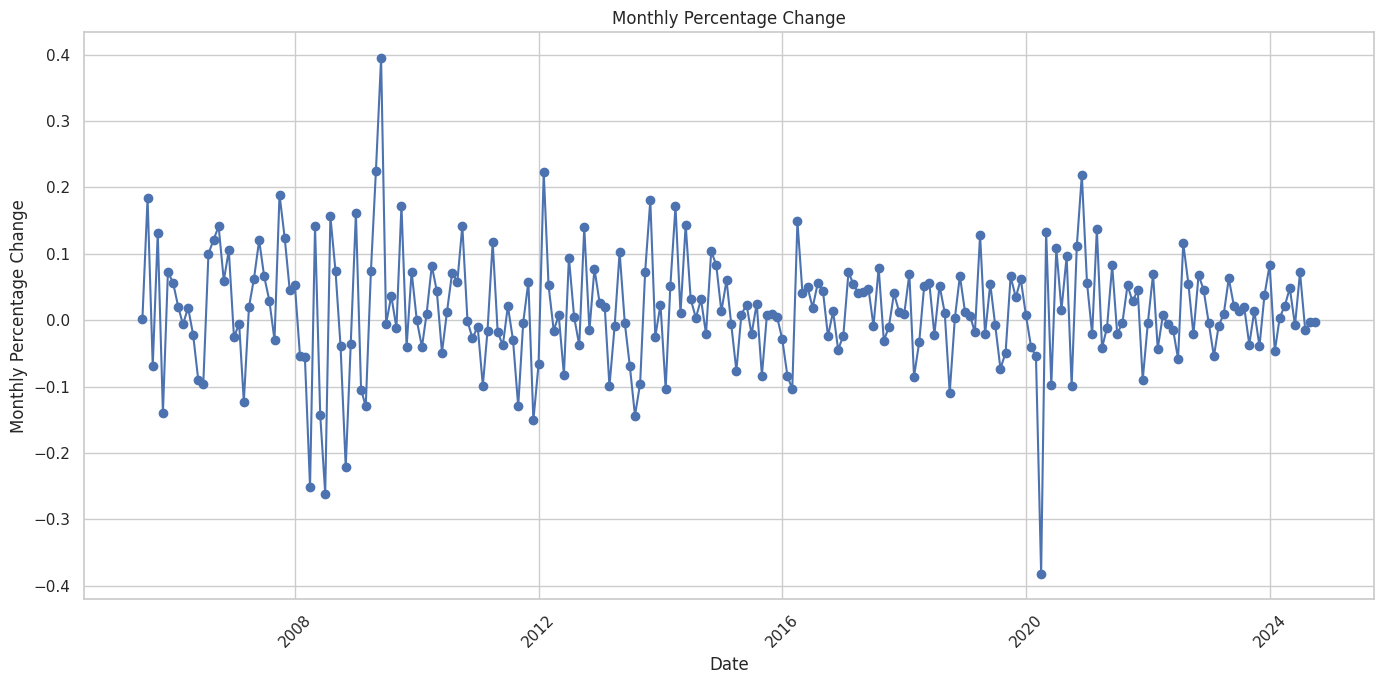

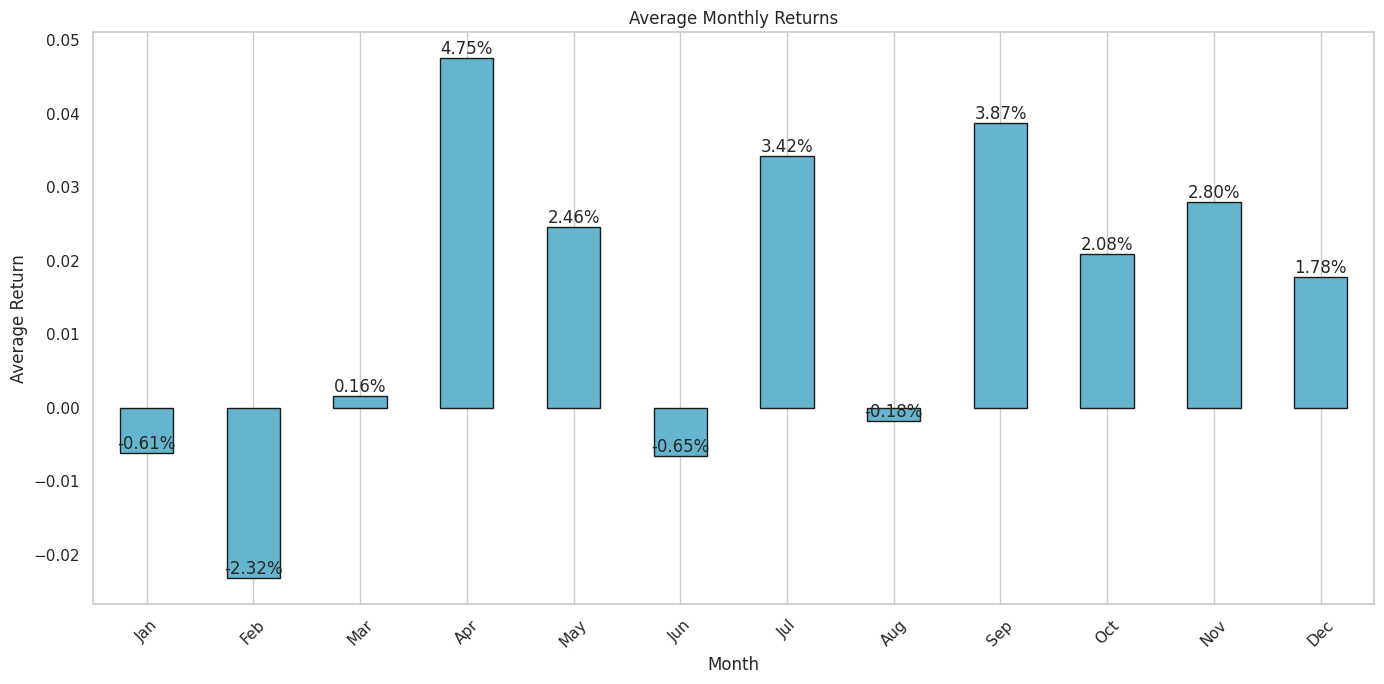

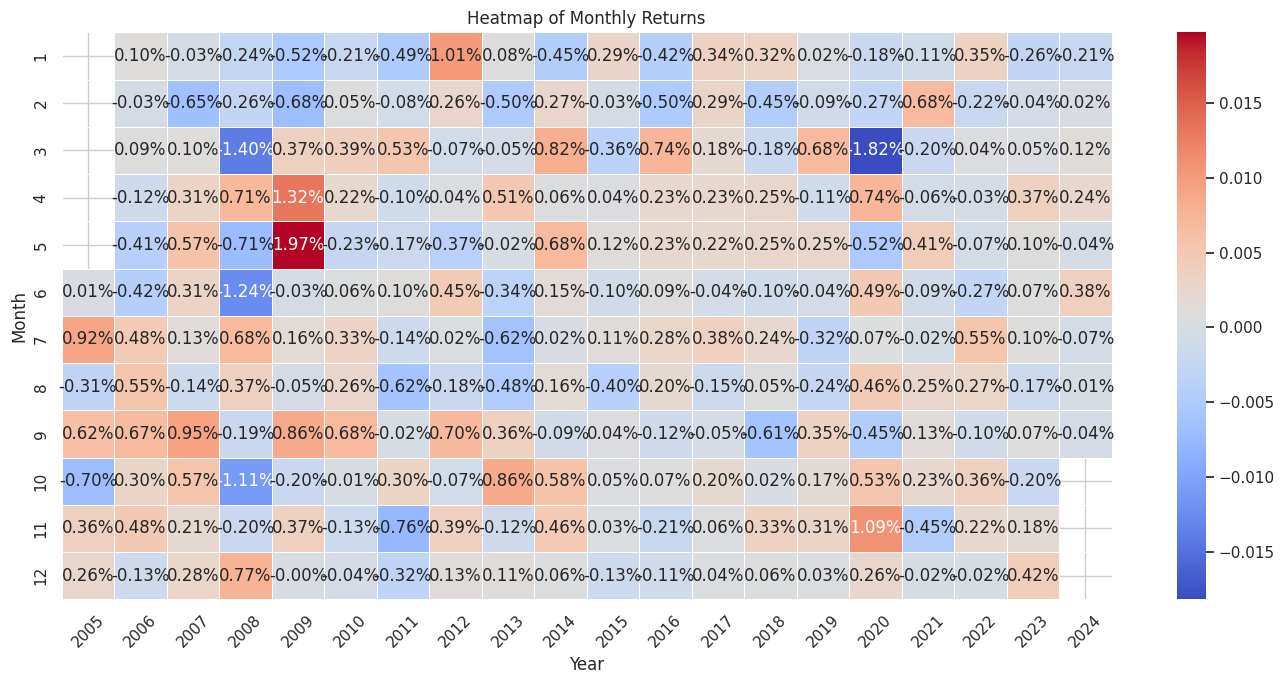

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Line Plot of Monthly Percentage Change
plt.figure(figsize=(14, 7))
plt.plot(monthly_df.index, monthly_df['pct'], marker='o', linestyle='-', color='b')
plt.title('Monthly Percentage Change')
plt.xlabel('Date')
plt.ylabel('Monthly Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar Plot of Average Monthly Returns with Annotations
plt.figure(figsize=(14, 7))
bars = monthly_avg.plot(kind='bar', color='c', edgecolor='k')

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2%}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom')

plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Heatmap of Monthly Returns
# Resample data to get monthly returns (mean of daily percentage changes)
monthly_returns = df['pct'].resample('M').mean()
monthly_returns = monthly_returns.reset_index()

# Add year and month columns
monthly_returns['Year'] = monthly_returns['Date'].dt.year
monthly_returns['Month'] = monthly_returns['Date'].dt.month

# Pivot table to get a matrix format for the heatmap
heatmap_data = monthly_returns.pivot(index='Month', columns='Year', values='pct')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2%", linewidths=0.5)
plt.title('Heatmap of Monthly Returns')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# NIFTY Bank stocks analysis

In [16]:
df1 # NSE tokens from Alice Blue

,Exch,Exchange Segment,Group Name,Symbol,Token,Instrument Type,Instrument Name,Formatted Ins Name,Trading Symbol,Lot Size,Tick Size
0,NSE,nse_cm,EQ,011NSETEST,14747,0,011NSETEST,011NSETEST-EQ,011NSETEST-EQ,1.0,0.05
1,NSE,nse_cm,EQ,GULFOILLUB,4391,0,GULF OIL LUB. IND. LTD.,GULFOILLUB-EQ,GULFOILLUB-EQ,1.0,0.05
2,NSE,nse_cm,EQ,GUJRAFFIA,4548,0,GUJARAT RAFFIA INDUST LTD,GUJRAFFIA-EQ,GUJRAFFIA-EQ,1.0,0.05
3,NSE,nse_cm,EQ,GUJGASLTD,10599,0,GUJARAT GAS LIMITED,GUJGASLTD-EQ,GUJGASLTD-EQ,1.0,0.05
4,NSE,nse_cm,EQ,GUJAPOLLO,14677,0,GUJ. APOLLO IND. LTD.,GUJAPOLLO-EQ,GUJAPOLLO-EQ,1.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...
6467,NSE,nse_idx,NaN,NIFTY SMLCAP 250,26062,INDEX,NaN,NIFTY SMLCAP 250,NaN,NaN,0.05
6468,NSE,nse_idx,NaN,NIFTY MIDSML 400,26063,INDEX,NaN,NIFTY MIDSML 400,NaN,NaN,0.05
6469,NSE,nse_idx,NaN,NIFTY200 QUALTY30,26064,INDEX,NaN,NIFTY200 QUALTY30,NaN,NaN,0.05
6470,NSE,nse_idx,NaN,NIFTY MIDCAP SELECT,26074,INDEX,NaN,NIFTY MIDCAP SELECT,NaN,NaN,0.05


In [17]:
# APRIL MONTH RETURN OF BANKING STOCKS

In [20]:

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2005, 5, 13)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks with April in Top 3 Months of Highest Average Return:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        2263, 5900, 21238, 1023, 5258, 10666, 4668, 1333, 1922, 11184, 4963, 3045
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months
        top_months = monthly_stats.head(3)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        if 4 in top_months.index:  # Check if July (7) is one of the top 3 months
            stock_name = get_stock_name(alice, token)
            top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: V8CLPhbe9kF6DMlTbKMLyRSRK2MzSaTE3nyUeADp0U0qNMQHl97DlHH2SUP7ARepNX6bvHF0Pu1rcvmjvBUMUAijUMm3nFZqCnHbYMl4TISAR6nM6NdMok253onmsSSb

Stocks with April in Top 3 Months of Highest Average Return:

BANDHANBNK-EQ:
April: 11.47%
November: 7.02%
June: 4.34%

AXISBANK-EQ:
April: 6.35%
January: 3.92%
October: 3.79%

AUBANK-EQ:
November: 8.32%
April: 7.57%
July: 6.14%

FEDERALBNK-EQ:
April: 6.07%
May: 4.53%
September: 3.66%

INDUSINDBK-EQ:
April: 6.95%
September: 5.34%
May: 3.83%

BANKBARODA-EQ:
July: 6.08%
April: 4.77%
November: 3.94%

HDFCBANK-EQ:
April: 4.26%
November: 3.77%
May: 2.94%

KOTAKBANK-EQ:
April: 7.10%
May: 6.22%
November: 5.59%

ICICIBANK-EQ:
April: 5.93%
October: 5.10%
July: 4.56%

SBIN-EQ:
July: 5.18%
September: 4.25%
April: 4.02%

Data saved to top_stocks.csv


In [21]:
# MONTHLY data of average returns

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2011, 7, 13)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks return on monthly basis:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        2263, 5900, 21238, 1023, 5258, 10666, 4668, 1333, 1922, 11184, 4963, 3045
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months based on average returns
        top_months = monthly_stats.head(12)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        # Add the stock to the list regardless of specific months
        stock_name = get_stock_name(alice, token)
        top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: V8CLPhbe9kF6DMlTbKMLyRSRK2MzSaTE3nyUeADp0U0qNMQHl97DlHH2SUP7ARepNX6bvHF0Pu1rcvmjvBUMUAijUMm3nFZqCnHbYMl4TISAR6nM6NdMok253onmsSSb

Stocks return on monthly basis:

BANDHANBNK-EQ:
April: 11.47%
November: 7.02%
June: 4.34%
July: 3.18%
December: 1.59%
February: -1.51%
May: -2.52%
August: -2.73%
September: -3.08%
October: -4.12%
January: -7.40%
March: -8.73%

AXISBANK-EQ:
October: 5.83%
January: 5.13%
April: 4.55%
May: 1.64%
November: 1.49%
December: 1.26%
June: 0.98%
February: 0.36%
September: 0.25%
August: -0.21%
March: -2.55%
July: -6.64%

AUBANK-EQ:
November: 8.32%
April: 7.57%
July: 6.14%
January: 3.34%
October: 2.36%
December: 1.35%
August: 0.50%
February: 0.36%
September: -2.42%
May: -2.54%
June: -2.65%
March: -8.25%

FEDERALBNK-EQ:
June: 3.99%
April: 3.53%
May: 3.18%
October: 2.43%
September: 2.02%
December: 1.92%
February: 0.78%
January: 0.24%
November: -0.04%
March: -3.01%
July: -3.03%
August: -4.44%

INDUSINDBK-EQ:
April: 4.37%
Nove

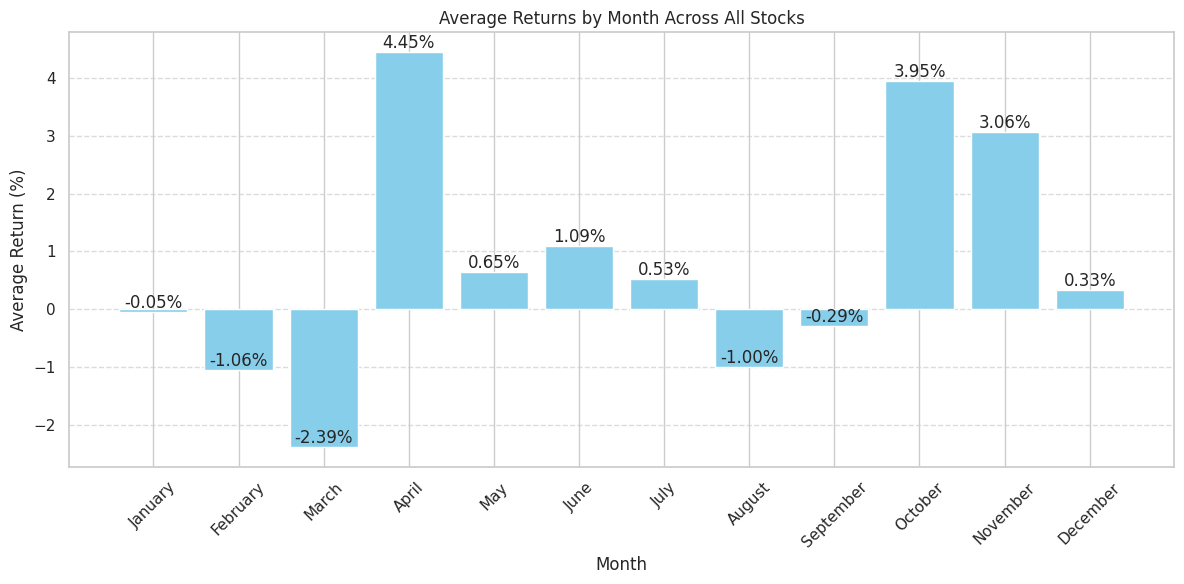

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for each stock's monthly returns
data = {
    'Stock': ['BANDHANBNK-EQ', 'AXISBANK-EQ', 'AUBANK-EQ', 'FEDERALBNK-EQ', 'INDUSINDBK-EQ',
             'PNB-EQ', 'BANKBARODA-EQ', 'HDFCBANK-EQ', 'KOTAKBANK-EQ', 'IDFCFIRSTB-EQ',
             'ICICIBANK-EQ', 'SBIN-EQ'],
    'January': [-7.40, 5.13, 3.34, 0.24, 0.07, 0.99, -6.43, 0.20, 0.54, 0.13, 2.60, 0.04],
    'February': [-1.51, 0.36, 0.36, 0.78, 1.07, -9.60, -1.41, 0.12, 0.05, 0.38, -2.66, -0.66],
    'March': [-8.73, -2.55, -8.25, -3.01, -1.91, 0.95, 1.73, 0.77, 0.81, -8.70, -0.05, 0.32],
    'April': [11.47, 4.55, 7.57, 3.53, 4.37, 3.14, 2.38, 2.91, 4.54, 2.41, 4.35, 2.23],
    'May': [-2.52, 1.64, -2.54, 3.18, 2.07, -3.54, -3.24, 2.88, 4.38, 0.31, 1.90, 3.24],
    'June': [4.34, 0.98, -2.65, 3.99, 0.99, 1.30, -0.35, 2.75, -0.56, 1.61, -0.49, 1.14],
    'July': [3.18, -6.64, 6.14, -3.03, 3.24, 2.08, 2.81, -5.81, -3.89, 3.12, 3.12, 1.99],
    'August': [-2.73, -0.21, 0.50, -4.44, -0.54, -3.74, -3.58, 0.43, 0.99, 6.28, -0.43, -4.53],
    'September': [-3.08, 0.25, -2.42, 2.02, 2.74, -0.67, 0.19, -2.69, 1.33, 0.15, -0.79, -0.47],
    'October': [-4.12, 5.83, 2.36, 2.43, 2.49, 7.59, 5.32, 2.56, 4.70, 3.27, 8.90, 6.05],
    'November': [7.02, 1.49, 8.32, -0.04, 3.65, 3.44, 4.48, 3.15, 2.70, 4.39, 0.48, -2.35],
    'December': [1.59, 1.26, 1.35, 1.92, 1.35, -5.12, 2.86, 0.41, -0.26, 2.46, -4.55, 0.72]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the month as the index
df = df.set_index('Stock')

# Calculate the average return for each month across all stocks
monthly_avg_returns = df.mean()

# Create a DataFrame for plotting
monthly_avg_returns = monthly_avg_returns.reset_index()
monthly_avg_returns.columns = ['Month', 'Average Return']

# Define the order of months for sequential plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_returns['Month'] = pd.Categorical(monthly_avg_returns['Month'], categories=months_order, ordered=True)
monthly_avg_returns = monthly_avg_returns.sort_values('Month')

# Plot the average returns
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_avg_returns['Month'], monthly_avg_returns['Average Return'], color='skyblue')

# Add the return values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Average Returns by Month Across All Stocks')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


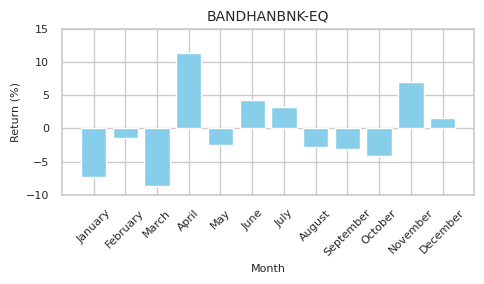

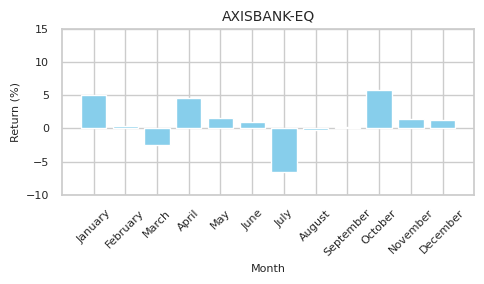

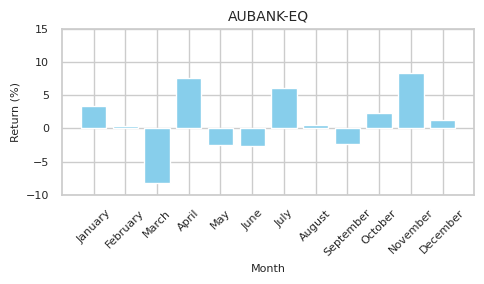

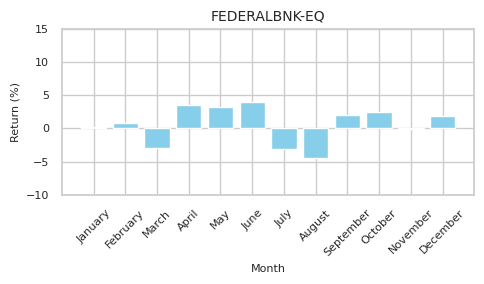

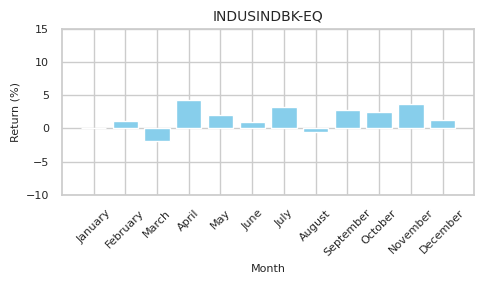

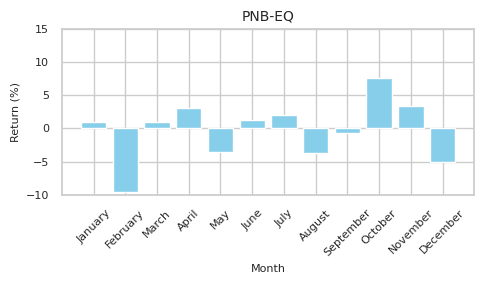

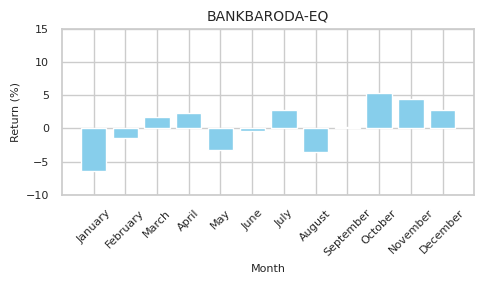

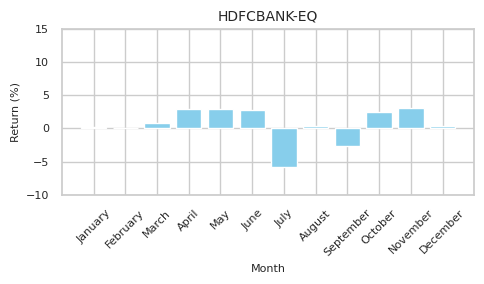

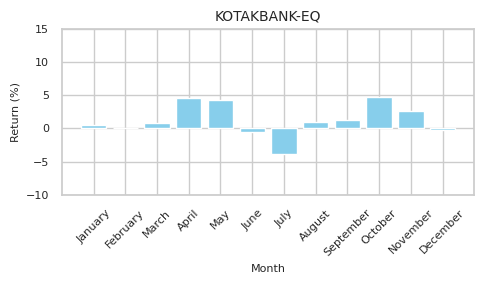

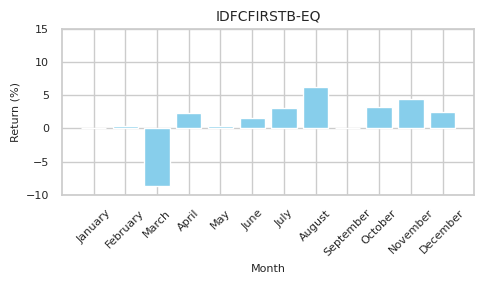

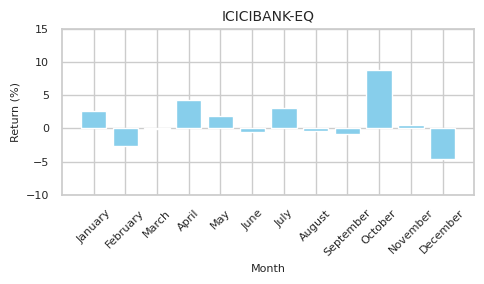

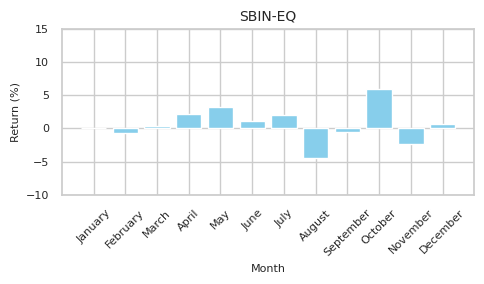

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for each stock's monthly returns
data = {
    'Stock': ['BANDHANBNK-EQ', 'AXISBANK-EQ', 'AUBANK-EQ', 'FEDERALBNK-EQ', 'INDUSINDBK-EQ',
             'PNB-EQ', 'BANKBARODA-EQ', 'HDFCBANK-EQ', 'KOTAKBANK-EQ', 'IDFCFIRSTB-EQ',
             'ICICIBANK-EQ', 'SBIN-EQ'],
    'January': [-7.40, 5.13, 3.34, 0.24, 0.07, 0.99, -6.43, 0.20, 0.54, 0.13, 2.60, 0.04],
    'February': [-1.51, 0.36, 0.36, 0.78, 1.07, -9.60, -1.41, 0.12, 0.05, 0.38, -2.66, -0.66],
    'March': [-8.73, -2.55, -8.25, -3.01, -1.91, 0.95, 1.73, 0.77, 0.81, -8.70, -0.05, 0.32],
    'April': [11.47, 4.55, 7.57, 3.53, 4.37, 3.14, 2.38, 2.91, 4.54, 2.41, 4.35, 2.23],
    'May': [-2.52, 1.64, -2.54, 3.18, 2.07, -3.54, -3.24, 2.88, 4.38, 0.31, 1.90, 3.24],
    'June': [4.34, 0.98, -2.65, 3.99, 0.99, 1.30, -0.35, 2.75, -0.56, 1.61, -0.49, 1.14],
    'July': [3.18, -6.64, 6.14, -3.03, 3.24, 2.08, 2.81, -5.81, -3.89, 3.12, 3.12, 1.99],
    'August': [-2.73, -0.21, 0.50, -4.44, -0.54, -3.74, -3.58, 0.43, 0.99, 6.28, -0.43, -4.53],
    'September': [-3.08, 0.25, -2.42, 2.02, 2.74, -0.67, 0.19, -2.69, 1.33, 0.15, -0.79, -0.47],
    'October': [-4.12, 5.83, 2.36, 2.43, 2.49, 7.59, 5.32, 2.56, 4.70, 3.27, 8.90, 6.05],
    'November': [7.02, 1.49, 8.32, -0.04, 3.65, 3.44, 4.48, 3.15, 2.70, 4.39, 0.48, -2.35],
    'December': [1.59, 1.26, 1.35, 1.92, 1.35, -5.12, 2.86, 0.41, -0.26, 2.46, -4.55, 0.72]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot each stock's returns individually in smaller, more compact figures
for i, stock in enumerate(df['Stock']):
    plt.figure(figsize=(5, 3))  # Reduce figure size for compactness
    plt.bar(df.columns[1:], df.loc[i, df.columns[1:]], color='skyblue')
    plt.title(stock, fontsize=10)  # Reduce font size of title
    plt.xlabel('Month', fontsize=8)  # Smaller axis labels
    plt.ylabel('Return (%)', fontsize=8)
    plt.xticks(rotation=45, fontsize=8)  # Smaller ticks
    plt.yticks(fontsize=8)
    plt.ylim(-10, 15)  # Adjust y-axis limits for better bar visibility
    plt.tight_layout()
    plt.show()

